# BLACK FRIDAY
Black Friday is an informal name for the Friday following Thanksgiving Day in the United States, which is celebrated on the fourth Thursday of November. The day after Thanksgiving has been regarded as the beginning of America's Christmas shopping season since 1952, although the term "Black Friday" didn't become widely used until more recent decades.

### INTRODUCTION
I found it interesting to analyse a blackfriday sales dataset revolving around a hypothetical store and data of its shoppers. .The dataset is comprised of 537577 observations and 12 variables about Black Friday shoppers in a retail store, it contains different kinds of variables either numerical or categorical. It contains missing values.

The dataset is publicly available and downloadable can be found at: https://www.kaggle.com/mehdidag/black-friday

### OBJECTIVE
The objective of this project is to determine which model would be the best fit for the data by accurately predicting the sales.In order to achieve the goal we will divide our project execution into three stages:

1)Data extraction:Download the publicy available dataset and describe the dataset

2)Data cleanup:We willclean the dataset by examining the missing values and then hanle them either by removing them or imputing them with appropriate values.Also we need to check if there are any special characters in the variables which might cause an error while running the model.

3)EDA:perform exploratory data analysis in order to discover hidden insights and trends of the data.

4)Data Modelling:We will then model the data with three different type of models (Linear Regression,Decision Tree and Random Forest) and check which fits the data by best by examing their R squared score and mean squared error.The model having the least mean squared error and the highest R square score will be selected .

5)Tuning the final model:The final model selected will then be tuned further so that the accuracy increases.



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
import seaborn as sns
import os

In [4]:
os.getcwd()

'C:\\Users\\PRIYA'

In [5]:
df=pd.read_csv("BlackFriday.csv")

### Data description

In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
df.shape

(537577, 12)

In [8]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


### Data Cleaning

Let's see if there are missing values.

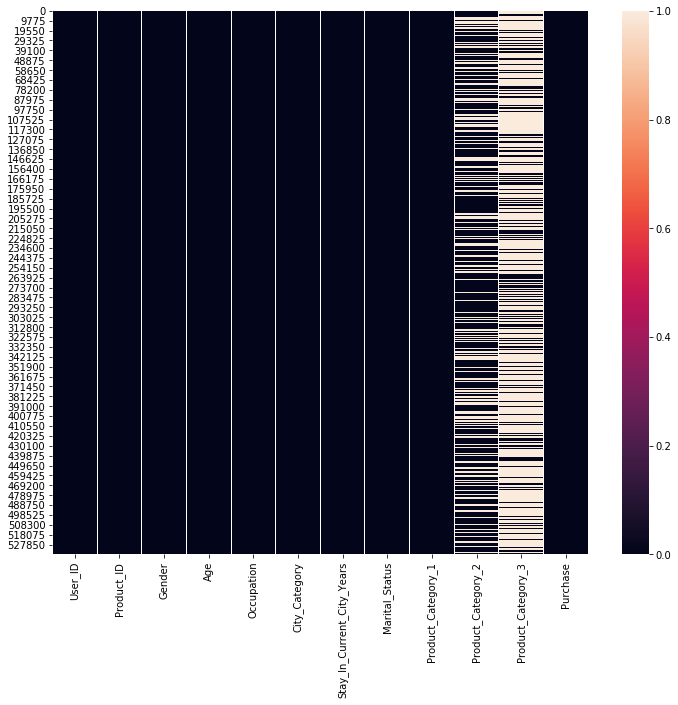

In [12]:
plt.figure(figsize=(12,10))

sns.heatmap(df.isnull())


 We can see that there are missing values only in "Product_Category_2"and "Product_Category_3""

In [13]:
df.Product_Category_2.value_counts(dropna=False)

NaN     166986
8.0      63058
14.0     54158
2.0      48481
16.0     42602
15.0     37317
5.0      25874
4.0      25225
6.0      16251
11.0     13945
17.0     13130
13.0     10369
9.0       5591
12.0      5419
10.0      2991
3.0       2835
18.0      2730
7.0        615
Name: Product_Category_2, dtype: int64

In [14]:
df.Product_Category_3.value_counts(dropna=False)

NaN     373299
16.0     32148
15.0     27611
14.0     18121
17.0     16449
5.0      16380
8.0      12384
9.0      11414
12.0      9094
13.0      5385
6.0       4818
18.0      4563
4.0       1840
11.0      1773
10.0      1698
3.0        600
Name: Product_Category_3, dtype: int64

In "Product_Category_2" we have 166986 null values
In "Product_Category_3" we have 373299 null values..
We observe that Product_Category_3 has greater null values as compared as to Product_Category_2

Handling NA values by relpacing them with zero

In [15]:
df.fillna(0,inplace=True)

Let's see if there are any missing values remaining

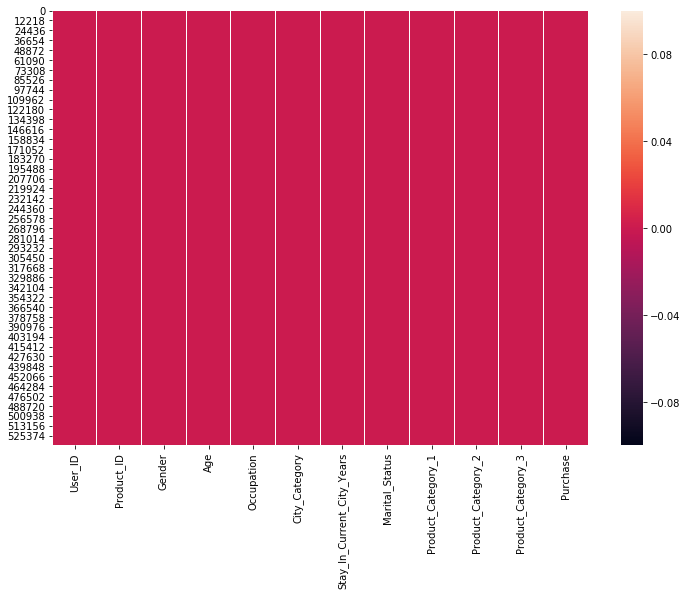

In [16]:
plt.figure(figsize=(12,8))

sns.heatmap(df.isnull())

We observe that there are no NA values in the dataset

There are still some special characters, like (+) in the columns 'Age' and 'stay in Current City_Years, which need to be removed, before models can be run.

In [17]:
df['Age']=(df['Age'].str.strip('+'))

In [18]:
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

Inspecting the data again

In [19]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null float64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 49.2+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2.0,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2.0,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2.0,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55,16,C,4.0,0,8,0.0,0.0,7969


### Exploratory Data Analysis

## 1)CORRELATION MATRIX

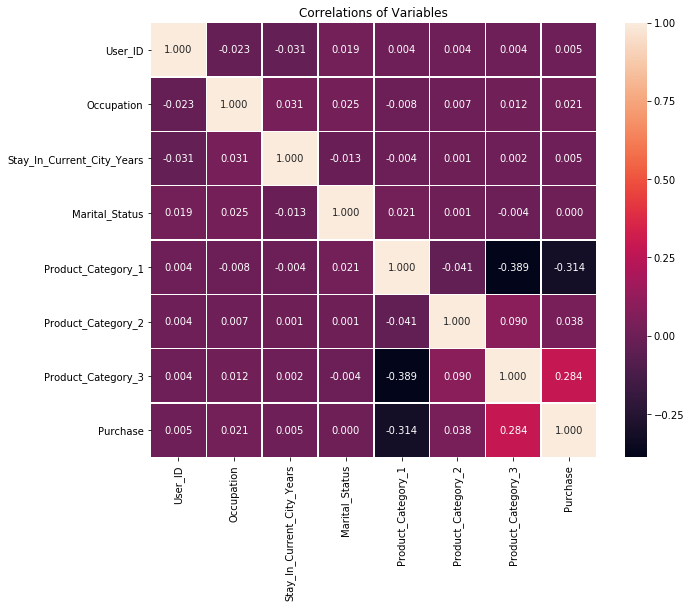

In [20]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(),annot=True,linewidth=.5,fmt=".3f")
plt.title("Correlations of Variables")
plt.show()


The significant highlights from the above plot are the positive correlation coefficients of three variables as a function of Purchase:

1)Product_Category_3

2)Product_Category_2

3)Occupation

Increase in any of the values for the above three features is likey to result in a higher purchase from the customer.

## 2)JOINTPLOT OF PURCHASE AND OCCUPATION

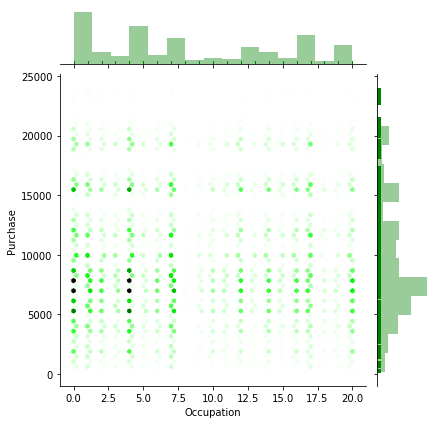

In [21]:
sb.jointplot(x='Occupation',y='Purchase',data=df, kind='hex',
             marginal_kws=dict(bins=15, rug=True),annot_kws=dict(stat="r"),edgecolor="w",color="g",linewidth=1
)

The First takeaway would be that maximum of the purchase is done between 5000-10000.
Next crucial takeaway, would be the occupations that result to highest purchases. In this case, it would be occupation 0, closely followed that by 4 and 7.
The store can run  advertiements next time around to people with above mentioned occupations as they more likely to spend within the above purchase range.

## 3)PAIRPLOT OF Product_Category_3 ,Product_Category_2 ,Occupation AND PURCHASE.

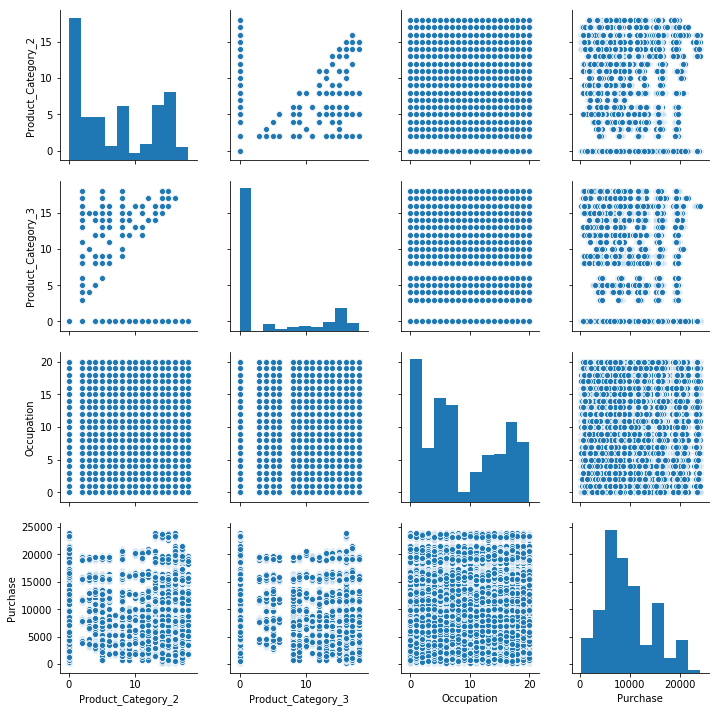

In [22]:
f=sb.pairplot(df,vars=["Product_Category_2","Product_Category_3","Occupation","Purchase"])

## BARPLOT OF GENDER VS PURCHASE BY CITY_CATEGORY

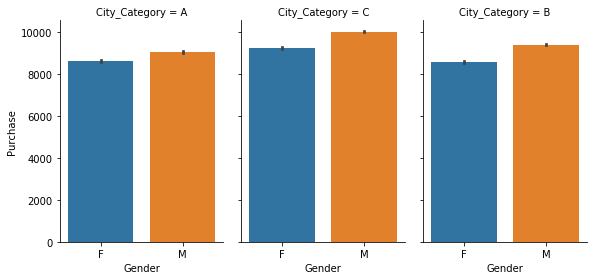

In [23]:
g = sns.catplot(x="Gender", y="Purchase",col="City_Category",data=df, kind="bar",height=4, aspect=.7)


People from City_Category C have higher purchase capacity as compared to the other two cities on average.
For City_categories B,C and A Males tend to show higher purchasing as compared to Female.It is a useful insight, and it be useful to oserve which age group of males does higher purchasing.

## BARPLOT OF AGE VS PURCHASE BY GENDER

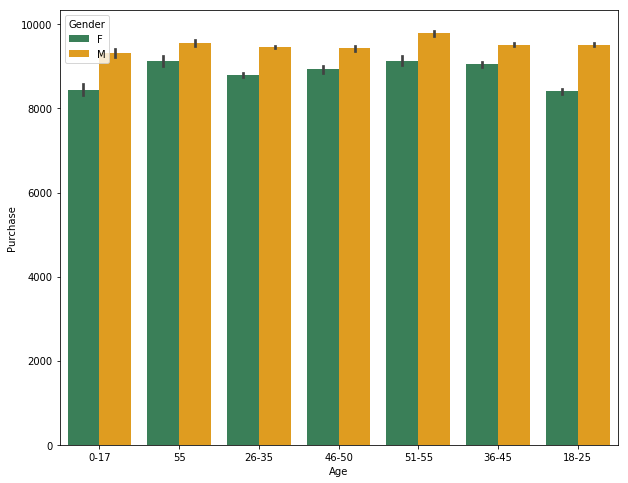

In [24]:
plt.figure(figsize=(10,8))
pal={"F":"seagreen","M":"orange"}
h=sb.barplot(x="Age",y="Purchase",data=df,hue="Gender",palette=pal)

We observe that in Age-Group 51-55 Males purchase the highest as compared to the other Age groups while in the age group 55 Females purchase the highest as compared to the other Age groups.Also in all the Age Groups Males tend to dominate Females.

## BARPLOT DISPLAYING TOP 10 PRODUCTS

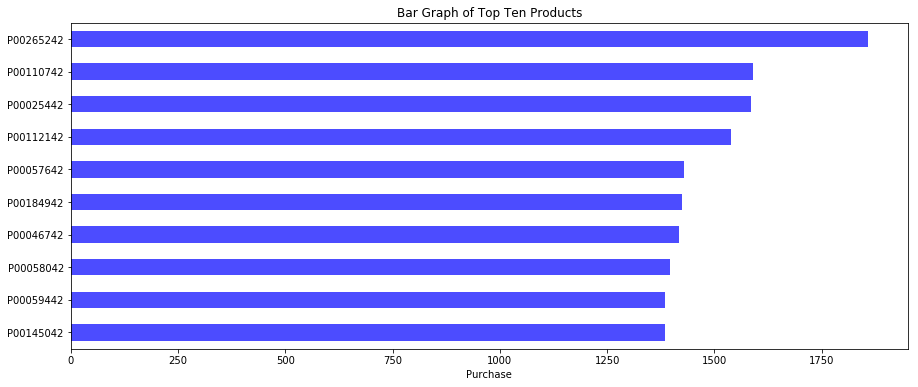

In [25]:
plt.rcParams["axes.facecolor"]="w"
df["Product_ID"].value_counts()[:10].plot(kind="barh",color="b",alpha=.7,figsize=(15,6))
plt.title("Bar Graph of Top Ten Products")
plt.xlabel("Purchase")
plt.gca().invert_yaxis()
plt.show()

The bar graph above displays the Top 10 products sold with P00265242 recording the highest sales while P00145042 recording the lowest sales.

## BOXPLOT OF CITY_CATEGORY VS PURCHASE 

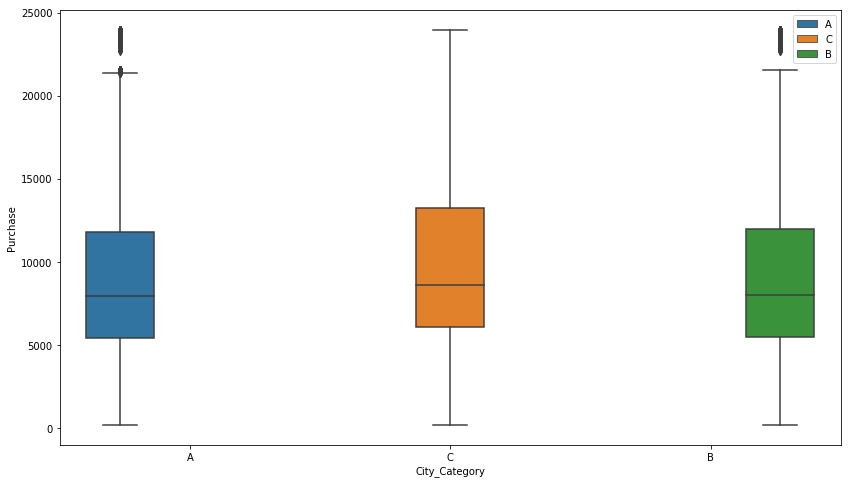

In [26]:
plt.figure(figsize=(14,8))
sb.boxplot(x="City_Category",y="Purchase",data=df,hue="City_Category")
plt.gca().legend().set_title('')

We observe that city_category_A and city_category_B has outliers .

### TRAINING AND TESTING THE DATA

In [27]:
#Dividing the data into test and train datasets
X = df.iloc[:, 2:11].values
y = df.iloc[:, 11].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Lets inspect each of the split datasets

In [28]:
X_train

array([['M', '26-35', 0, ..., 8, 0.0, 0.0],
       ['M', '26-35', 2, ..., 5, 0.0, 0.0],
       ['M', '26-35', 0, ..., 8, 14.0, 0.0],
       ...,
       ['F', '46-50', 15, ..., 5, 0.0, 0.0],
       ['M', '18-25', 4, ..., 2, 4.0, 0.0],
       ['M', '55', 17, ..., 8, 17.0, 0.0]], dtype=object)

In [29]:
y_train

array([ 7837,  8762,  7778, ...,  6991, 13251,  9905], dtype=int64)

In [30]:
X_test

array([['F', '18-25', 4, ..., 1, 8.0, 9.0],
       ['M', '26-35', 20, ..., 7, 0.0, 0.0],
       ['M', '51-55', 2, ..., 6, 8.0, 0.0],
       ...,
       ['F', '26-35', 1, ..., 8, 0.0, 0.0],
       ['M', '26-35', 14, ..., 5, 14.0, 0.0],
       ['M', '36-45', 14, ..., 6, 16.0, 0.0]], dtype=object)

In [31]:
y_test

array([11394, 12781, 20068, ...,  7957,  8770, 20487], dtype=int64)

## LABEL ENCODING
For X_train and X_test, there are categorical variables, which need to be encoded before they can be put into the data model. We will convert each of the variable step by step and cross check our results.

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_train = LabelEncoder()
X_train

array([['M', '26-35', 0, ..., 8, 0.0, 0.0],
       ['M', '26-35', 2, ..., 5, 0.0, 0.0],
       ['M', '26-35', 0, ..., 8, 14.0, 0.0],
       ...,
       ['F', '46-50', 15, ..., 5, 0.0, 0.0],
       ['M', '18-25', 4, ..., 2, 4.0, 0.0],
       ['M', '55', 17, ..., 8, 17.0, 0.0]], dtype=object)

In [33]:
X_train[:, 0] = labelencoder_X_train.fit_transform(X_train[:, 0])
X_train

array([[1, '26-35', 0, ..., 8, 0.0, 0.0],
       [1, '26-35', 2, ..., 5, 0.0, 0.0],
       [1, '26-35', 0, ..., 8, 14.0, 0.0],
       ...,
       [0, '46-50', 15, ..., 5, 0.0, 0.0],
       [1, '18-25', 4, ..., 2, 4.0, 0.0],
       [1, '55', 17, ..., 8, 17.0, 0.0]], dtype=object)

In [34]:
X_train[:, 1] = labelencoder_X_train.fit_transform(X_train[:, 1])
X_train

array([[1, 2, 0, ..., 8, 0.0, 0.0],
       [1, 2, 2, ..., 5, 0.0, 0.0],
       [1, 2, 0, ..., 8, 14.0, 0.0],
       ...,
       [0, 4, 15, ..., 5, 0.0, 0.0],
       [1, 1, 4, ..., 2, 4.0, 0.0],
       [1, 6, 17, ..., 8, 17.0, 0.0]], dtype=object)

In [35]:
X_train[:, 3] = labelencoder_X_train.fit_transform(X_train[:, 3])
X_train

array([[1, 2, 0, ..., 8, 0.0, 0.0],
       [1, 2, 2, ..., 5, 0.0, 0.0],
       [1, 2, 0, ..., 8, 14.0, 0.0],
       ...,
       [0, 4, 15, ..., 5, 0.0, 0.0],
       [1, 1, 4, ..., 2, 4.0, 0.0],
       [1, 6, 17, ..., 8, 17.0, 0.0]], dtype=object)

Repeating the same steps for the X_test dataset

In [36]:
labelencoder_X_test = LabelEncoder()
X_test

array([['F', '18-25', 4, ..., 1, 8.0, 9.0],
       ['M', '26-35', 20, ..., 7, 0.0, 0.0],
       ['M', '51-55', 2, ..., 6, 8.0, 0.0],
       ...,
       ['F', '26-35', 1, ..., 8, 0.0, 0.0],
       ['M', '26-35', 14, ..., 5, 14.0, 0.0],
       ['M', '36-45', 14, ..., 6, 16.0, 0.0]], dtype=object)

In [37]:
X_test[:, 0] = labelencoder_X_test.fit_transform(X_test[:, 0])
X_test

array([[0, '18-25', 4, ..., 1, 8.0, 9.0],
       [1, '26-35', 20, ..., 7, 0.0, 0.0],
       [1, '51-55', 2, ..., 6, 8.0, 0.0],
       ...,
       [0, '26-35', 1, ..., 8, 0.0, 0.0],
       [1, '26-35', 14, ..., 5, 14.0, 0.0],
       [1, '36-45', 14, ..., 6, 16.0, 0.0]], dtype=object)

In [38]:
X_test[:, 1] = labelencoder_X_test.fit_transform(X_test[:, 1])
X_test

array([[0, 1, 4, ..., 1, 8.0, 9.0],
       [1, 2, 20, ..., 7, 0.0, 0.0],
       [1, 5, 2, ..., 6, 8.0, 0.0],
       ...,
       [0, 2, 1, ..., 8, 0.0, 0.0],
       [1, 2, 14, ..., 5, 14.0, 0.0],
       [1, 3, 14, ..., 6, 16.0, 0.0]], dtype=object)

In [39]:
X_test[:, 3] = labelencoder_X_test.fit_transform(X_test[:, 3])
X_test

array([[0, 1, 4, ..., 1, 8.0, 9.0],
       [1, 2, 20, ..., 7, 0.0, 0.0],
       [1, 5, 2, ..., 6, 8.0, 0.0],
       ...,
       [0, 2, 1, ..., 8, 0.0, 0.0],
       [1, 2, 14, ..., 5, 14.0, 0.0],
       [1, 3, 14, ..., 6, 16.0, 0.0]], dtype=object)

### FEATURE SCALING

In [40]:
# Feature Scaling of training and test set
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## DATA MODELLLING
Will now implement some Regression Models and check which model will be the most adequate for the data by comparing the various metrics

## Applying Linear Regression Model:

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [42]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
y_pred_mlr = lr.predict(X_test)


In [44]:
c=len(X_test)
c

107516

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


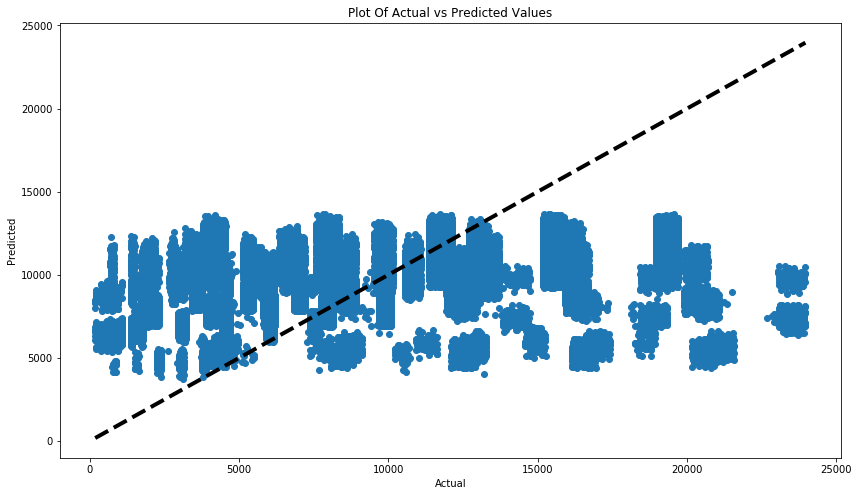

In [45]:
fig,ax = plt.subplots(figsize=(14,8))
ax.scatter(y_test,y_pred_mlr )
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Plot Of Actual vs Predicted Values")
fig.show()

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_mlr)
r_square_score = r2_score(y_test, y_pred_mlr)
print('Mean Square Error = ',mse)
print('R_Square Score = ',r_square_score)

Mean Square Error =  21427313.068689752
R_Square Score =  0.1331323019968571


## Applying Decision Tree Regressor Model

In [47]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [48]:
y_pred_dt = dt_model.predict(X_test)

In [49]:
from sklearn.metrics import r2_score,mean_squared_error
mse1 = mean_squared_error(y_test,y_pred_dt)
r_square_score1 = r2_score(y_test, y_pred_dt)
print('Mean Square error = ',mean_squared_error(y_test, y_pred_dt))
print('R_Squared Score = ',r2_score(y_test, y_pred_dt))

Mean Square error =  11115315.102292933
R_Squared Score =  0.5503165709850975


## Applying Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50,random_state=0)
rf.fit(X_train,y_train)
y_head=rf.predict(X_test)
from sklearn.metrics import mean_squared_error
mse2=mean_squared_error(y_test, y_head)
print(mse2)
r_square_score2=r2_score(y_test,y_head)
print(r_square_score2)


9282974.11913373
0.6244461272638568


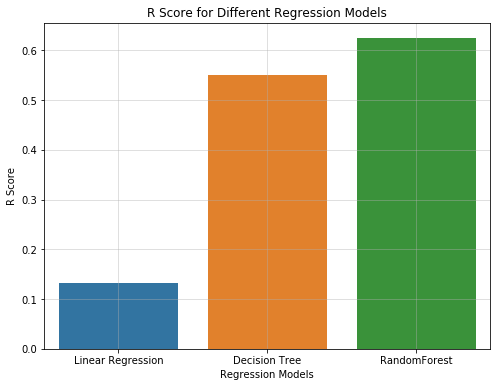

In [51]:
x = ["Linear Regression","Decision Tree","RandomForest"]
y = np.array([r2_score(y_test, y_pred_mlr),r2_score(y_test, y_pred_dt),r2_score(y_test,y_head)])
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x,y)
plt.ylabel("R Score")
plt.xlabel("Regression Models")
plt.title("R Score for Different Regression Models")
plt.grid(alpha=0.5)
plt.show()

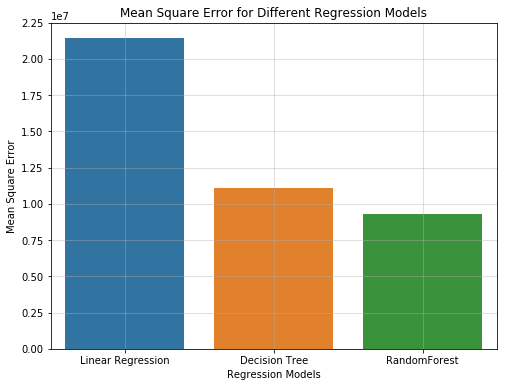

In [52]:
x = ["Linear Regression","Decision Tree","RandomForest"]
y = np.array([mean_squared_error(y_test, y_pred_mlr),mean_squared_error(y_test, y_pred_dt),mean_squared_error(y_test,y_head)])
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x,y)
plt.ylabel("Mean Square Error")
plt.xlabel("Regression Models")
plt.title("Mean Square Error for Different Regression Models")
plt.grid(alpha=0.5)
plt.show()

After comparing all the three models we observe that the Random forest Regressor model has the lowest mean square error and the highest R square.Hence making it a better fit for the data as compared to the other models.

## TUNING THE RANDOM REGRESSOR MODEL IN ORDER TO IMPROVE THE ACCURACY
WE will now do some parameter tuning by tuning the model for different leaf size in order to get the optimum R score and lowest mean absolute error

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
sample_leaf_options = [1,5,10,50,100,200,500]
for leaf_size in sample_leaf_options :
        model = RandomForestRegressor(n_estimators = 50, oob_score = True, n_jobs = -1,random_state =50,max_features="auto",min_samples_leaf=leaf_size)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        mean_square_error1=mean_squared_error(y_test, y_pred)
        print('leaf size = ',leaf_size)
        print('Mean Square error = ',mean_squared_error(y_test, y_pred))
        R_Squared_score12=r2_score(y_test,y_pred)
        print('R_Square = ',r2_score(y_test,y_pred))
        print(" ")

leaf size =  1
Mean Square error =  9274025.309266971
R_Square =  0.6248081621202196
 
leaf size =  5
Mean Square error =  8425715.828921027
R_Square =  0.6591275415059756
 
leaf size =  10
Mean Square error =  8320244.019339889
R_Square =  0.6633945303011983
 
leaf size =  50
Mean Square error =  8371109.516414254
R_Square =  0.6613367054952934
 
leaf size =  100
Mean Square error =  8451459.437440107
R_Square =  0.6580860528889153
 
leaf size =  200
Mean Square error =  8528486.1794836
R_Square =  0.6549698434815168
 
leaf size =  500
Mean Square error =  8739481.640871221
R_Square =  0.6464337685515498
 


After tuning the Random Forest Regressor Model we observe that the model performs best when the Mean square error is 8320244.019339889 and the R_Square is 0.6633945303 for min_samples_leaf=10,hence improving the accuracy.

## CONCLUSION
Out of the three models we applied on our dataset the linear regression performs the poorest while Random Forest Regressor Model performs the best.The Random Forest model is finetuned in order to improve the accuracy indicating a better predictive ability.